#### Elastic Net Regression implementation from Sratch

###### the infos are based on the Salary data from 'database' folder

In [3]:
# Imports
import numpy as np 
import pandas as pd
from numpy import ndarray
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class ElasticNetReg():

    def __init__(self, learnrate: float, iter: int, penaltyL1: int, penaltyL2: int):
        self.learnrate = learnrate
        self.iter = iter
        self.l1 = penaltyL1
        self.l2 = penaltyL2

    def fit(self, X: ndarray, Y: ndarray):
        # no. of entries and features
        self.m, self.n = X.shape
        # coeff
        self.theta = np.zeros(self.n)
        self.intercept = 0
        self.X = X
        self.Y = Y
        for _ in range(self.iter):
            self.update_theta()

    def predict(self, X: ndarray):
        return X.dot(self.theta) + self.intercept

    def update_theta(self):
        y_pred = self.predict(self.X)

        dtheta = np.zeros(self.n)

        for i in range(self.n):

            if self.theta[i] > 0:
                dtheta[i] = (- (2* (self.X[:, i]).dot(self.Y - y_pred)) + self.l1 + 2 * self.l2 * self.theta[i]) / self.m
            else:
                dtheta[i] = (-2* (self.X[:, i].dot(self.Y - y_pred)) - self.l1 + self.l2 * 2 * self.theta[i]) / self.m

        dintercept = -2 * np.sum(self.Y - y_pred) / self.m

        self.theta = self.theta - self.learnrate * dtheta
        self.intercept = self.intercept - self.learnrate * dintercept
        return self
    







Predicted values: [ 40837.61 122887.43  65079.6 ]
Real values: [ 37731. 122391.  57081.]
Trained theta: 9323.84
Trained intercept: 26851.84


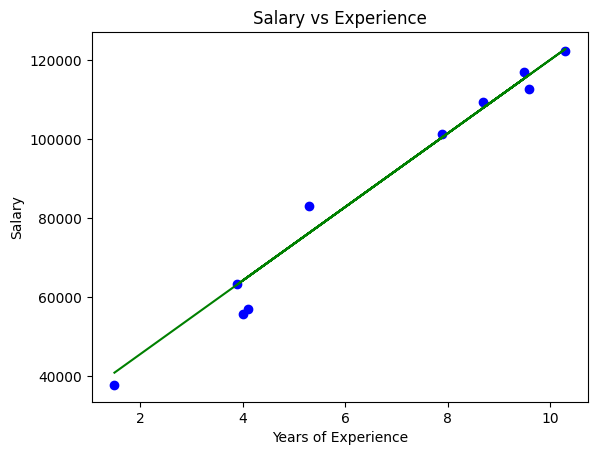

In [4]:
# Executable code
def main():

    data = pd.read_csv('../database/Salary_Data.csv')
    # .values at the end convert the DataFrame into a Numpy array (ndarray)
    X = data.iloc[:, :-1].values
    Y = data.iloc[:, -1].values

    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=1/3, random_state=0)

    ML = ElasticNetReg(.01, 1000, 500, 1)
    ML.fit(xtrain, ytrain)

    y_pred = ML.predict(xtest)

    print(f"Predicted values: {np.round( y_pred[:3], 2)}")
    print(f"Real values: {ytest[:3]}")
    print(f"Trained theta: {round(ML.theta[0], 2)}")
    print(f"Trained intercept: {round(ML.intercept, 2)}")

    plt.scatter(xtest, ytest, color="b")
    plt.plot(xtest, y_pred, color='g')
    plt.title('Salary vs Experience')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.show()

main()